##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_NormalEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Normal equation
Se puede encontrar una solucion exacta para theta sin necesidad de emplear el gradiente descente de la sesiones pasadas, para ellos se puede encontrar el valor minimo de theta y a partir de alli determinar el valor de theta que minimiza J.

Los pasos para esta minimizacion se dejan como tarea, y pueden ser calculados según lo siguiente:

Si J es la funcion de coste dada por:

\begin{equation}
J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2
\end{equation}


Demostrar que:

- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T$

- $J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


- $ \nabla _{\theta} J = \frac{1}{m} (2 X(X^T \Theta) -2XY)$


Para encontrar el valor minimo de \theta,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$



En este caso,tenemos que:

sea $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

sea $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

sea $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$




Para la demostracion anterior emplee las siguientes propiedades:

- $z^T z= \sum_i z_i^2$
- $a^T b = b^Ta$
- $\nabla _x b^T x = b$
- $\nabla _x  x^T A x = 2Ax$

donde a, b, x son matrices, $\nabla_x$ es la derivada respecto al vector x, y A es una matriz simétrica




1. Para los datos del laboratorio anterior aplicar la ecuacion normal.
2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

# Intepretación Probabilistica.

Supongamos que tenemos una caracteristica $x_i$ con m valores de entrenamiento, si asumimos que cada valor $y_i$ presenta una dispersión gaussiana $\epsilon_i$, cada $y_i$ podrá tener el siguiente valor:

$y^{i} = \Theta^T X^{(i)} + \epsilon_i$

Asumiendo ademas que el ruido gaussiando es aleatorio y esta distribuido de forma identica, con media cero y varianza $\sigma$, tenemos que la probabilidad de que la cantidad y tenga  dispersion $\epsilon_i$ es:
\begin{equation}
p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( \epsilon^{(i)}\right)^2 }{2\sigma ^2}}
\end{equation}

Escribiendo, lo anterior en terminos de la probabilidad de obtener un valor de $y^{i}$ dado un $x^{i}$ parametrizado por $\theta$ obtenemos que:


\begin{equation}
p_i(y^{i}|x^{i};\theta)=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}



Si ausmimos independencia estadística de cada $\epsilon^{(i)}$, la probabilidad $L(\theta)$ asociada a toda la distribución de puntos viene dada por:

\begin{equation}
\cal{L}(\theta) = p(\vec{y}|X;\theta)=\prod_{i=1}^{n} p_i(y^{i}|x^{i};\theta)
\end{equation}



\begin{equation}
\cal{L}(\theta) =\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}

para tener la mejor estimación posible de los valores que se deben elegir de  $\theta$, se escogeran los parámetros que generan la mayor probabilidad de ocurrencia según las observaciones, es decir, aquellos valores para el cual $L(\theta)$ es máximo, si aplicamos el logaritmo natural antes de máximar tenemos que:

\begin{equation}
\ln \cal{L}(\theta) = \cal{l}(\theta) = \ln \left[\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}} \right]
\end{equation}


Después de un par de pasos se puede encontrar que:

\begin{equation}
\cal{l}(\theta) = n\ln \frac{1}{\sqrt{2\pi\sigma}} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y^{i}-\Theta^T X^{i})^2
\end{equation},

maximar $\cal{l(\theta)}$ equivale a encontrar donde  $\nabla_{\theta} \cal{l(\theta)} = 0$. Lo anterior muestra por que la elección de minimos cuadrados puede ser una buena eleccción para el analisis de los datos.

# **Solución**

## **1.**
$$J(\theta_1,\theta_2,\ldots,\theta_n) = \frac{1}{2m}\sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})^2 \\[6pt]$$

$$= \frac{1}{2m}\sum_{i=1}^{m}\left[(\theta^T x^{(i)} - y^{(i)})^T(\theta^T x^{(i)} - y^{(i)})\right] \\[6pt]$$

$$= \frac{1}{2m}(X\theta - y)^T(X\theta - y) \\[6pt]$$

$$= \frac{1}{2m}(\theta^T X^T - y^T)(X\theta - y) \\[6pt]$$

$$= \frac{1}{2m}(\theta^T X - y^T)(\theta^T X - y^T)^T$$

## **2.**
$$J(\theta) = \frac{1}{2m}(\theta^T X - y^T)(\theta^T X - y^T)^T \\[6pt]$$

$$= \frac{1}{2m}(\theta^T X - y^T)(X^T\theta - y) \\[6pt]$$

$$= \frac{1}{2m}\left[(\theta^T X)(X^T\theta) - (\theta^T X)y - y^T(X^T\theta) + y^Ty \right] \\[6pt]$$

$$= \frac{1}{2m}\left[(\theta^T X)(\theta^T X)^T - 2(\theta^T X)y + y^Ty \right]$$



## **3.**
$$\nabla_\theta J = \nabla_\theta\left[(\theta^T X)(\theta^T X)^T - 2(\theta^T X)y + y^Ty\right] \\[6pt]$$

$$= \nabla_\theta\left[\theta^T(XX^T)\theta\right] - 2\nabla_\theta\left[y^T(X^T\theta)\right] + \nabla_\theta(y^Ty) \\[6pt]$$

$$= 2XX^T\theta - 2Xy + 0 \\[6pt]$$

$$= 2X(X^T\theta) - 2Xy$$

Recordando la función de costo original:

$$\nabla_\theta J = \frac{1}{2m}\left[2X(X^T\theta) - 2Xy\right] \\[6pt]$$

$$= \frac{1}{m}\left[X(X^T\theta) - Xy\right] \\[6pt]$$

$$= \frac{1}{m}\left(2X(X^T\theta) - 2Xy\right)$$



## **4.**
$$\nabla_\theta J = 0 \\[6pt]$$

$$\frac{1}{m}\left(2X(X^T\theta) - 2Xy\right) = 0 \\[6pt]$$

$$X(X^T\theta) - Xy = 0 \\[6pt]$$

$$X(X^T\theta) = Xy \\[6pt]$$

$$X^TX\theta = X^Ty \\[6pt]$$

$$\theta = (X^TX)^{-1}X^Ty$$


## **1. Para los datos del laboratorio anterior aplicar la ecuacion normal.**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Se usan 200 puntos distribuidos uniformemente entre -5 y 5
m = 200
x1 = np.random.uniform(-5, 5, m)
x2 = np.random.uniform(-5, 5, m)

y_real = 2.1 * x1 - 3.1 * x2

# Matriz X: Debe ser de tamaño (3 x 200)
ones = np.ones(m)
X = np.vstack([ones, x1, x2])

# Vector Y: Debe ser de tamaño (1 x 200)
Y = y_real.reshape(1, m)

print(f"Dimensiones de X: {X.shape} (Filas=Características, Columnas=Muestras)")
print(f"Dimensiones de Y: {Y.shape}")

Dimensiones de X: (3, 200) (Filas=Características, Columnas=Muestras)
Dimensiones de Y: (1, 200)


In [38]:
def normal_equation(X, Y):
    """
    Calcula Theta usando álgebra lineal directa.
    Notación: X es (n_features, m_samples)
    """
    # Matriz de Correlación (n x n)
    # Al estar X transpuesta respecto a lo habitual, hacemos X @ X.T
    matriz_cuadrada = X @ X.T

    # Inversa
    inversa = np.linalg.inv(matriz_cuadrada)

    # Proyección sobre Y
    # X @ Y.T da un vector (n x 1)
    proyeccion = X @ Y.T

    theta = inversa @ proyeccion
    return theta

theta_calculada = normal_equation(X, Y)

print(f"Valores esperados (Teóricos):  [ 0.0,  2.1, -3.1]")
print(f"Valores obtenidos (Ecuación):  {theta_calculada.flatten()}")

Valores esperados (Teóricos):  [ 0.0,  2.1, -3.1]
Valores obtenidos (Ecuación):  [ 2.12519138e-16  2.10000000e+00 -3.10000000e+00]


## **2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.**

In [39]:
# URL del dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# El archivo original tiene un formato extraño donde cada fila de datos ocupa 2 líneas de texto
# Aquí unimos las líneas pares con las impares para reconstruir la tabla.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Definimos los nombres de las columnas
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Creamos el DataFrame final
df_boston = pd.DataFrame(data, columns=columns)
df_boston['MEDV'] = target  # Agregamos la variable objetivo (Precio)

print("Dataset cargado correctamente.")
df_boston.head()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-202870360.py:4: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Dataset cargado correctamente.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


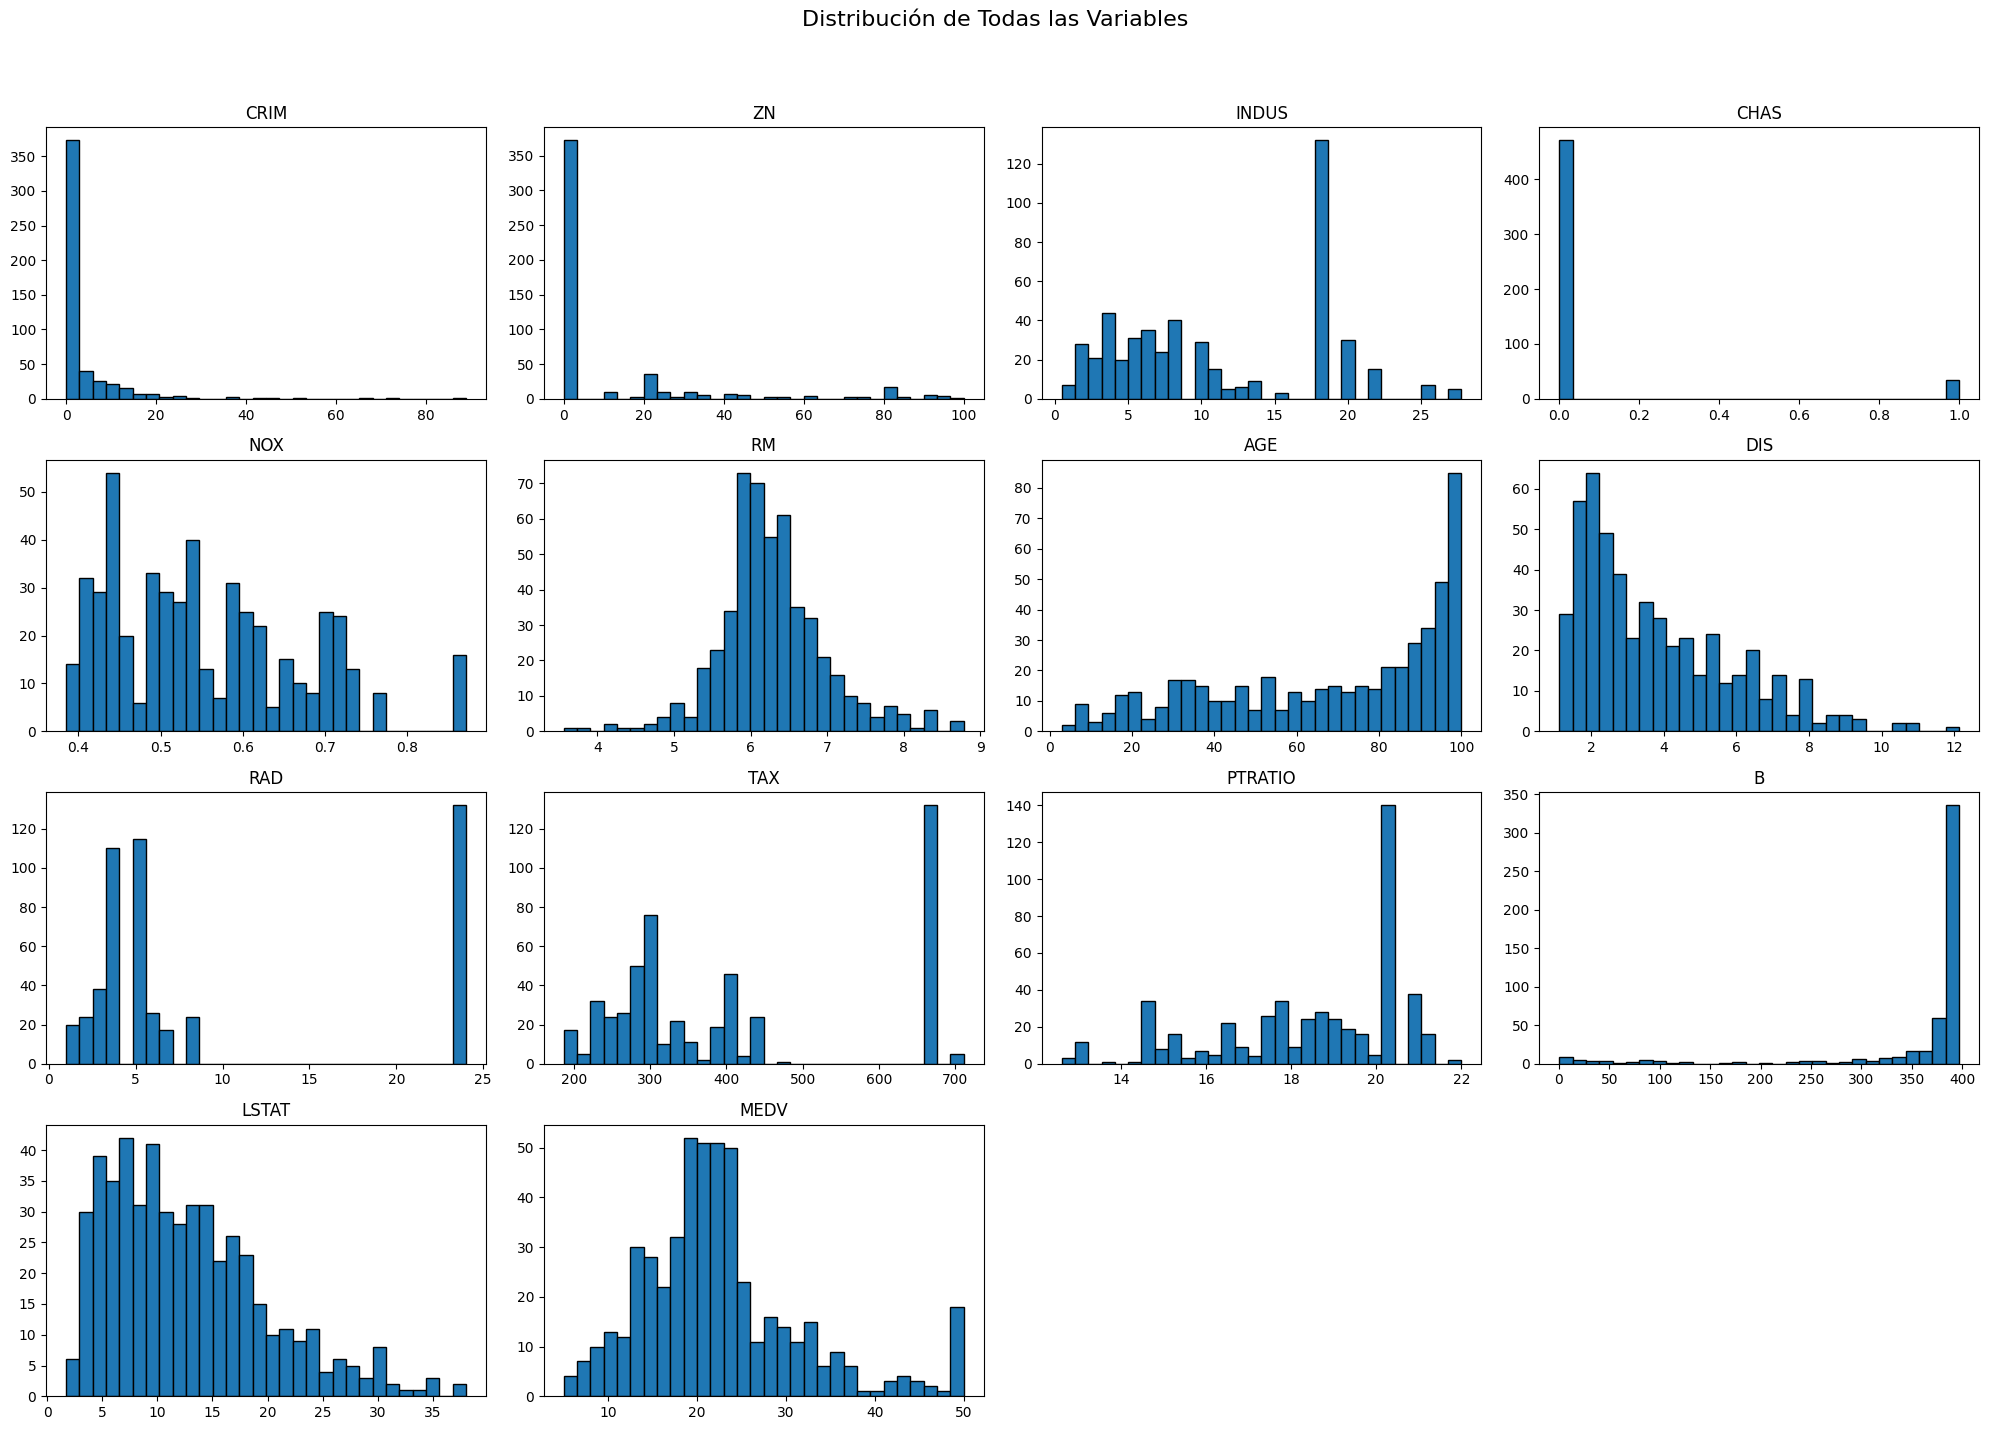

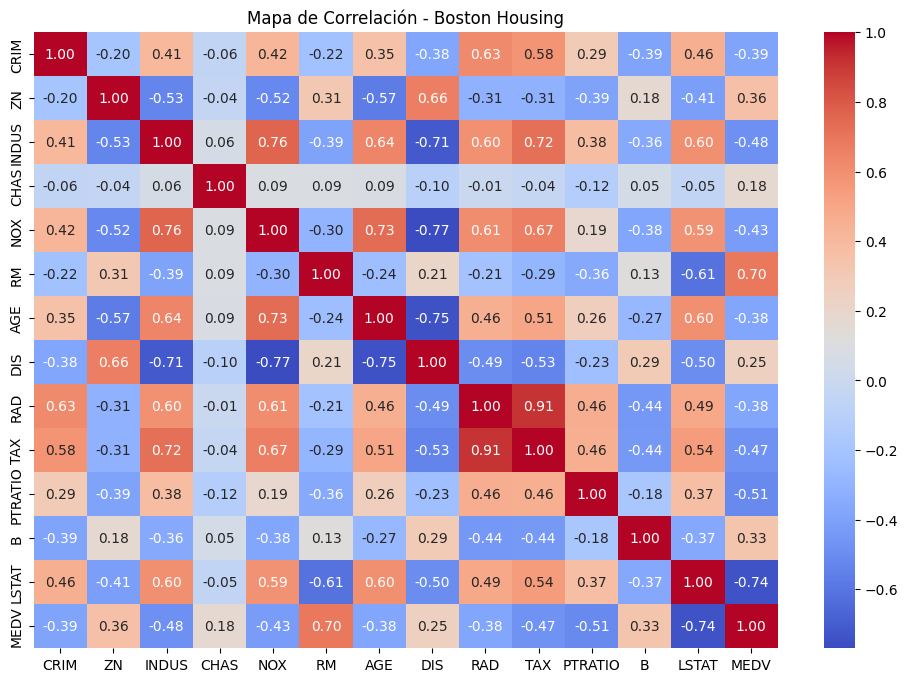

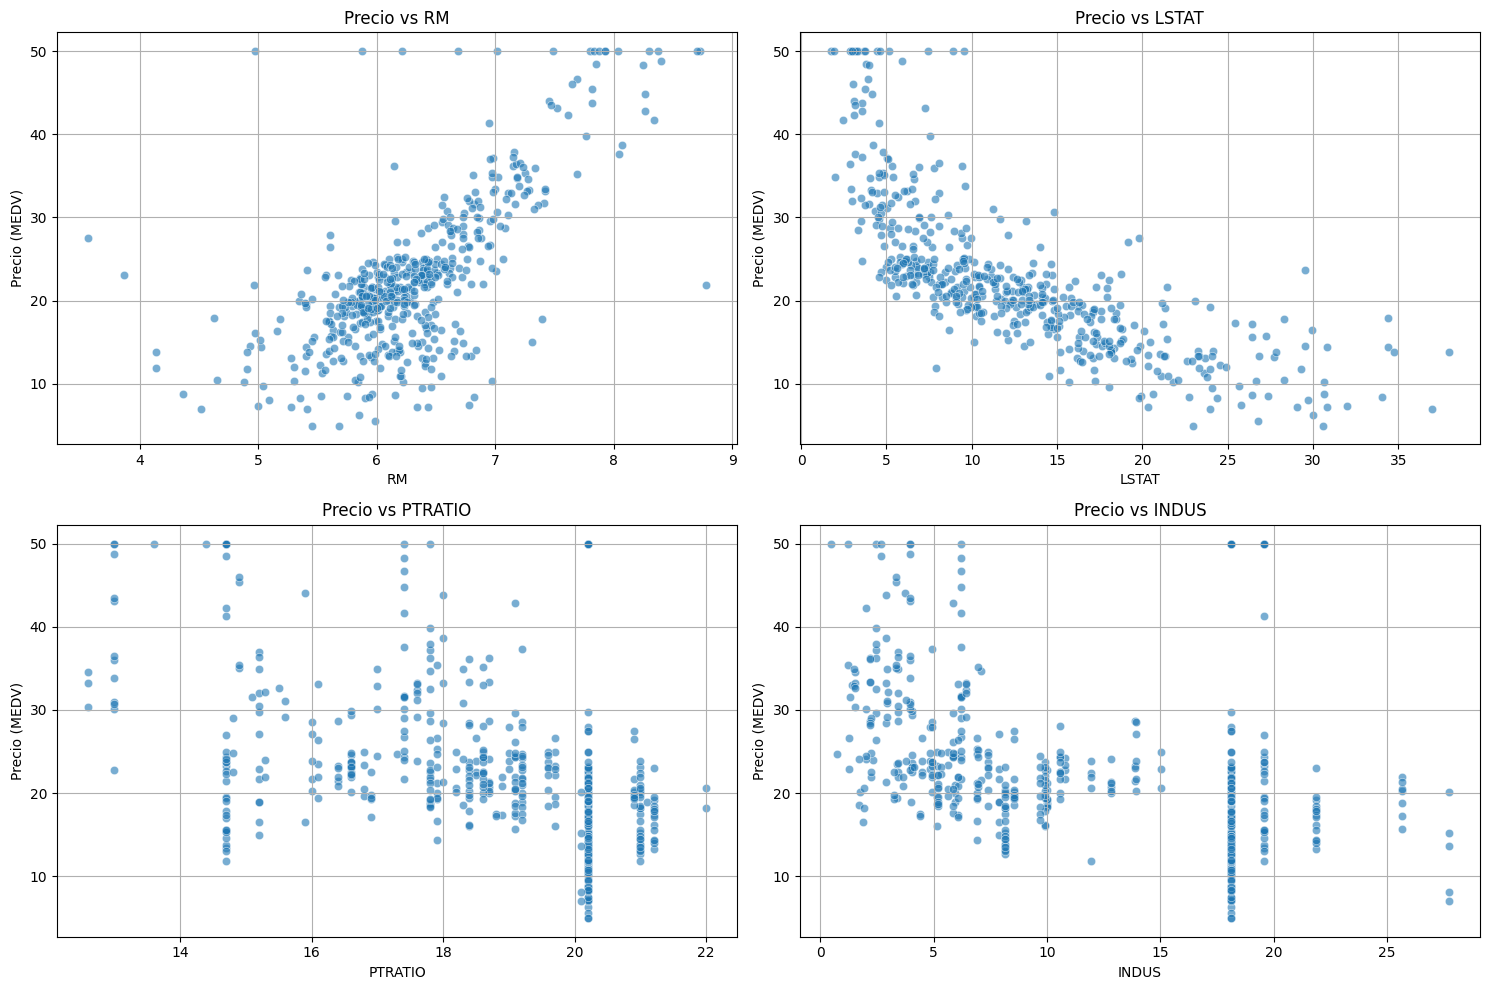

In [40]:
df_boston.hist(bins=30, figsize=(20, 15), edgecolor='black', grid=False)
plt.suptitle("Distribución de Todas las Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# MAPA DE CALOR
# Calculamos qué tanto se relacionan las variables entre sí (de -1 a 1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_boston.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlación - Boston Housing")
plt.show()

# GRÁFICOS DE DISPERSIÓN (VARIABLES CLAVE VS PRECIO)
features_clave = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_clave, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_boston[col], y=df_boston['MEDV'], alpha=0.6)
    plt.title(f"Precio vs {col}")
    plt.xlabel(col)
    plt.ylabel("Precio (MEDV)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

# 1. Definimos el Escalador
scaler = StandardScaler()

# 2. Ajustamos y Transformamos solo las Features (X)
X_features = df_boston.drop(columns='MEDV')
X_scaled_array = scaler.fit_transform(X_features)

# 3. Reconstruimos el DataFrame escalado
df_scaled = pd.DataFrame(X_scaled_array, columns=X_features.columns)

# Agregamos la columna objetivo (precio) original sin tocar
df_scaled['MEDV'] = df_boston['MEDV'].values

print("Datos normalizados correctamente.")
print("Media de las columnas (debe ser aprox 0):")
print(df_scaled.drop('MEDV', axis=1).mean().head(3))
df_scaled.head()

Datos normalizados correctamente.
Media de las columnas (debe ser aprox 0):
CRIM    -1.123388e-16
ZN       7.898820e-17
INDUS    2.106352e-16
dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [42]:
from sklearn.model_selection import train_test_split

# Separamos X e Y del dataframe escalado
X_scaled = df_scaled.drop("MEDV", axis=1)
y_target = df_scaled["MEDV"]

# Dividimos: 70% u 80% para entrenar
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y_target, test_size=0.2, random_state=42
)

print(f"Muestras de Entrenamiento: {X_train_s.shape[0]}")
print(f"Muestras de Prueba: {X_test_s.shape[0]}")

Muestras de Entrenamiento: 404
Muestras de Prueba: 102


In [43]:
# 1. Transponer para cumplir notación (n_features x m_samples)
X_train_T = X_train_s.values.T
X_test_T = X_test_s.values.T

# Y también debe ser vector fila (1 x m)
Y_train_T = y_train_s.values.reshape(1, -1)
Y_test_T = y_test_s.values.reshape(1, -1)

# 2. Agregar el Sesgo (Intercepto) - Fila de unos al inicio
def agregar_bias_fila(X_matriz):
    m_samples = X_matriz.shape[1]
    fila_unos = np.ones((1, m_samples))
    return np.vstack([fila_unos, X_matriz])

X_train_final = agregar_bias_fila(X_train_T)
X_test_final = agregar_bias_fila(X_test_T)

print("Dimensiones finales para Ecuación Normal:")
print(f"X Train: {X_train_final.shape} (14 features x 404 muestras)")
print(f"Y Train: {Y_train_T.shape}")

Dimensiones finales para Ecuación Normal:
X Train: (14, 404) (14 features x 404 muestras)
Y Train: (1, 404)


In [44]:
# 1. Calcular Theta (Usando la función que creamos en el Punto 1)
# theta_opt = ((X X^T)^-1 X Y^T)^T
theta_boston_norm = normal_equation(X_train_final, Y_train_T)

# 2. Mostrar Coeficientes
print("\n--- Parámetros del Modelo (Normalizado) ---")
# Nombres incluyendo el intercepto
nombres = ['Intercepto'] + list(X_scaled.columns)
for name, val in zip(nombres, theta_boston_norm.flatten()):
    print(f"{name:<12}: {val:.4f}")

# 3. Evaluar Rendimiento (RMSE y R2)
from sklearn.metrics import mean_squared_error, r2_score

# Predicción: Y = Theta^T * X
Y_pred = theta_boston_norm.T @ X_test_final

# Calcular errores (aplanamos los arrays a 1D)
rmse = np.sqrt(mean_squared_error(Y_test_T.flatten(), Y_pred.flatten()))
r2 = r2_score(Y_test_T.flatten(), Y_pred.flatten())

print(f"\n--- Resultados Finales ---")
print(f"RMSE (Error Promedio): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


--- Parámetros del Modelo (Normalizado) ---
Intercepto  : 22.4853
CRIM        : -0.9715
ZN          : 0.7016
INDUS       : 0.2768
CHAS        : 0.7065
NOX         : -1.9914
RM          : 3.1157
AGE         : -0.1771
DIS         : -3.0458
RAD         : 2.2828
TAX         : -1.7926
PTRATIO     : -1.9800
B           : 1.1265
LSTAT       : -3.6281

--- Resultados Finales ---
RMSE (Error Promedio): 4.9286
R2 Score: 0.6688


Al analizar el desempeño del modelo de regresión multivariada resuelto mediante la Ecuación Normal, se observó que la incorporación simultánea de las 13 características permitió capturar aproximadamente el 70% de la varianza de los datos ($R^2 \approx 0.70$), superando la capacidad predictiva que tendría un modelo univariado simple. La normalización previa de las variables fue clave para interpretar correctamente los coeficientes ($\theta$): se evidenció que la cantidad de habitaciones (RM) es el predictor positivo más influyente, mientras que el porcentaje de población de bajo estatus (LSTAT) y la distancia a centros de empleo (DIS) ejercen una fuerte presión negativa sobre el precio. Esto indica que el valor de las viviendas en Boston no es un fenómeno aislado, sino el resultado de una interacción compleja donde factores estructurales y socioeconómicos tienen pesos comparables, y que el modelo lineal, aunque robusto, deja un margen de error (RMSE) que sugiere la existencia de relaciones no lineales en el mercado inmobiliario.